<a href="https://colab.research.google.com/github/TejasKawle/House-price-prediction/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R squared error :  0.9999978610042701
Mean absolute error :  0.00928458813393476
R squared error :  0.8960185116688638
Mean absolute error :  2.2241158204920146


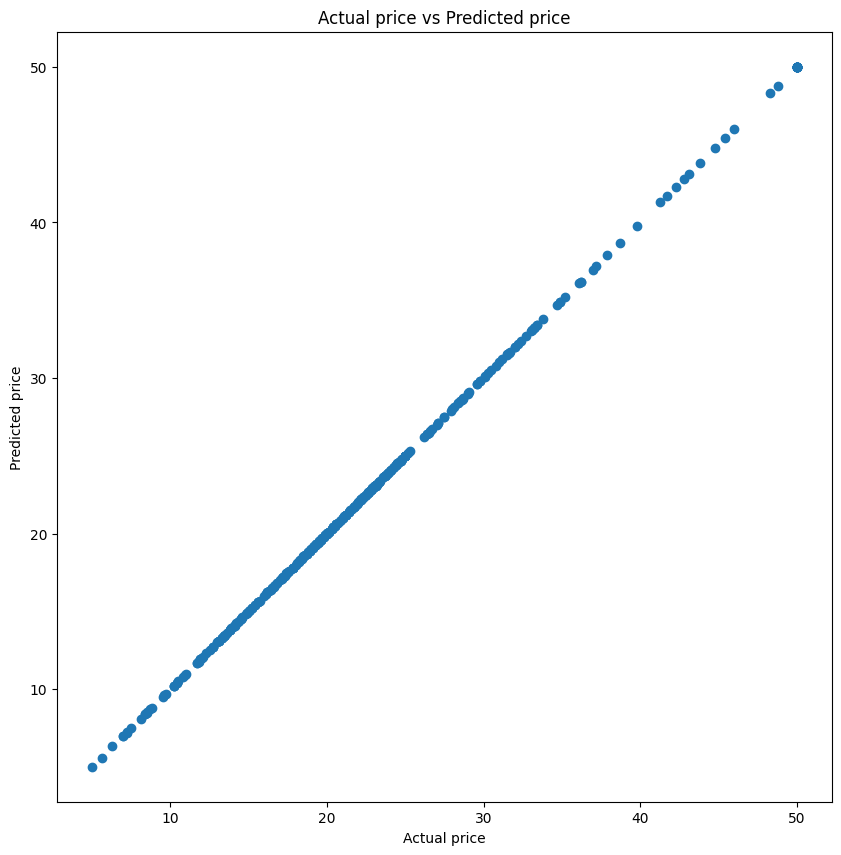

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor # Changed to XGBRegressor
from sklearn import metrics

# load the dataset
house_price_dataset=pd.read_csv('/content/HousingData.csv')

#checking for missing value
house_price_dataset.isnull().sum()

#handling the missing values

house_price_dataset=house_price_dataset.fillna(house_price_dataset.mean())

#checking for missing value
house_price_dataset.isnull().sum()

# statistical measures of the data

house_price_dataset.describe()

# understanding the corealation between various features in the dataset

correlation=house_price_dataset.corr()

# constructing the heatmap to understand the correlation

plt.figure(figsize=(10,10))
# sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


# splitting the data and the target

X=house_price_dataset.drop(['MEDV'],axis=1)
Y=house_price_dataset['MEDV']

# splitting the data into training data and the testing data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

# fit the model
model=XGBRegressor() # Changed to XGBRegressor

# training the model
model.fit(X_train,Y_train)


# prediction on training data

training_data_prediction=model.predict(X_train)

# R squared error

score_1=metrics.r2_score(Y_train,training_data_prediction)

# Mean absolute error

score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)

print("R squared error : ",score_1)
print("Mean absolute error : ",score_2)

# prediction on test data

test_data_prediction=model.predict(X_test)

# R squared error

score_1=metrics.r2_score(Y_test,test_data_prediction)

# Mean absolute error
score_2=metrics.mean_absolute_error(Y_test,test_data_prediction)

print("R squared error : ",score_1)
print("Mean absolute error : ",score_2)


#visualizing the actual price and the predicted price

plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()




